# Credit Approval Data Set

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Missão 2: Tipos de dados e EDA

Os dados trabalhados dizem a respeito de pedidos de cartões de crédito.  Todos os nomes de atributos e valores foram alterados para símbolos sem sentido para proteger a confidencialidade dos dados.
  
Este conjunto de dados possui uma boa mistura de atributos: contínuos, nominais com pequenos números de valores, e nominais com maior número de valores. Existem também alguns dados nulos.

O problema a ser tratado com esse dataset é um problema de classificação, a variável resposta é a A16, um pedido de cartão pode ser classificado como + (aprovado) ou como - (reprovado).

Informações sobre as variáveis

```
    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
```

## Importando e Explorando os Dados

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/data/crx.data', sep = ",")

# Visualização dos dados 
print(data.shape)
data.head(5)

(690, 15)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


Ao visualizar os dados nota-se que a variável A1 (como descrita no arquivo crx.names) não está representando duas classes: 
    A1:	b, a.

E sim uma variável contínua, que deveria ser a A2, os valores de a, b acabaram indo para o index, iremos corrigir isso e renomear as variáveis.

In [ ]:
data = data.rename_axis('A1').reset_index()
data.head(5)

,A1,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
d = {'A1' : 'A1',	'a1':'A2',	'a2':'A3',	'a3':'A4',	'a4':'A5',	'a5':'A6',	'a6':'A7',	'a7':'A8',	'a8':'A9',	'a9':'A10',	'a10':'A11',	'a11':'A12',	'a12':'A13',	'a13':'A14',	'a14':'A15',	'a15': 'A16'}

data.rename(columns = d, inplace = True)
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
# Droppando duplicatas

data.drop_duplicates(inplace= True)

### Média, desvio padrão, min, max e quartis de todas as variáveis numéricas

In [ ]:
data.describe() 

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


Nem todas as variáveis descritas como contínuas na descrição do dataset foram lidas como contínuas pelo python, isso será corrigido. No dataset os valores nulos estão sendo representados por ?, portanto iremos substitui-los pelo valor nulo do numpy para ficar mais fácil trabalhar com eles

In [ ]:
data = data.replace('?', np.nan)

data["A2"] = data["A2"].astype(np.float16)
a14_before = data["A14"]
data["A14"] = data["A14"].astype(np.float16)
data_sem_nulos = data.dropna(subset=['A2', 'A3', 'A8', 'A11', 'A14', 'A15'])
data_sem_nulos.describe() 

,A2,A3,A8,A11,A14,A15
count,666.000000,666.000000,666.000000,666.000000,666.00,666.000000
mean,31.562500,4.798078,2.222320,2.459459,inf,998.584084
std,11.921875,5.005309,3.347599,4.929794,inf,5202.975198
min,13.750000,0.000000,0.000000,0.000000,0.00,0.000000
25%,22.601562,1.010000,0.165000,0.000000,75.25,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.00,5.000000
75%,38.250000,7.207500,2.585000,3.000000,271.00,399.000000
max,80.250000,28.000000,28.500000,67.000000,2000.00,100000.000000


É interessante notar que o desvio padrão de muitas das variáveis chega a ser maior que sua média.

### Visualizando a distribuição das classes na variável resposta


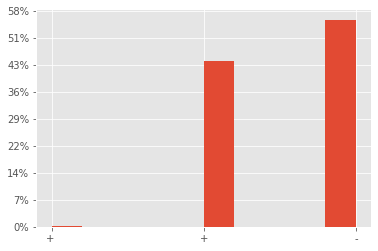

In [ ]:
from matplotlib.ticker import PercentFormatter

plt.style.use('ggplot')
plt.hist(data["A16"])
plt.gca().yaxis.set_major_formatter(PercentFormatter(690))


Notamos que existem algumas instâncias onde a classe "+" está com espaços vazios na string, fazendo com que o histograma indique que "+" e "+ " são duas classes diferentes, o que não é o caso, portanto iremos realizar um trim nessa variável.

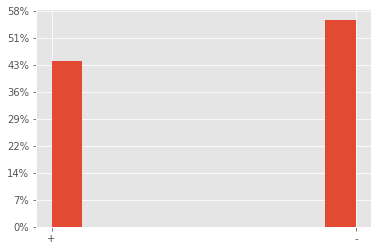

In [ ]:
def strp(a):
  return a.strip()

data["A16"] = data["A16"].apply(strp)

plt.style.use('ggplot')
plt.hist(data["A16"])
plt.gca().yaxis.set_major_formatter(PercentFormatter(690))

In [ ]:
data.A16.value_counts(normalize=True)

-    0.555072
+    0.444928
Name: A16, dtype: float64

Assim vemos que os dados estão distribuidos quase igualmente entre as duas classes, sendo os pedidos aprovados detentores de 44,5% do total e os reprovados de 55,5%

## Dados Nulos

Nesse gráfico o que está preenchido com preto são dados não nulos, além disso há uma barra no lado direito deste diagrama. Este é um gráfico de linha para a integridade dos dados de cada linha.




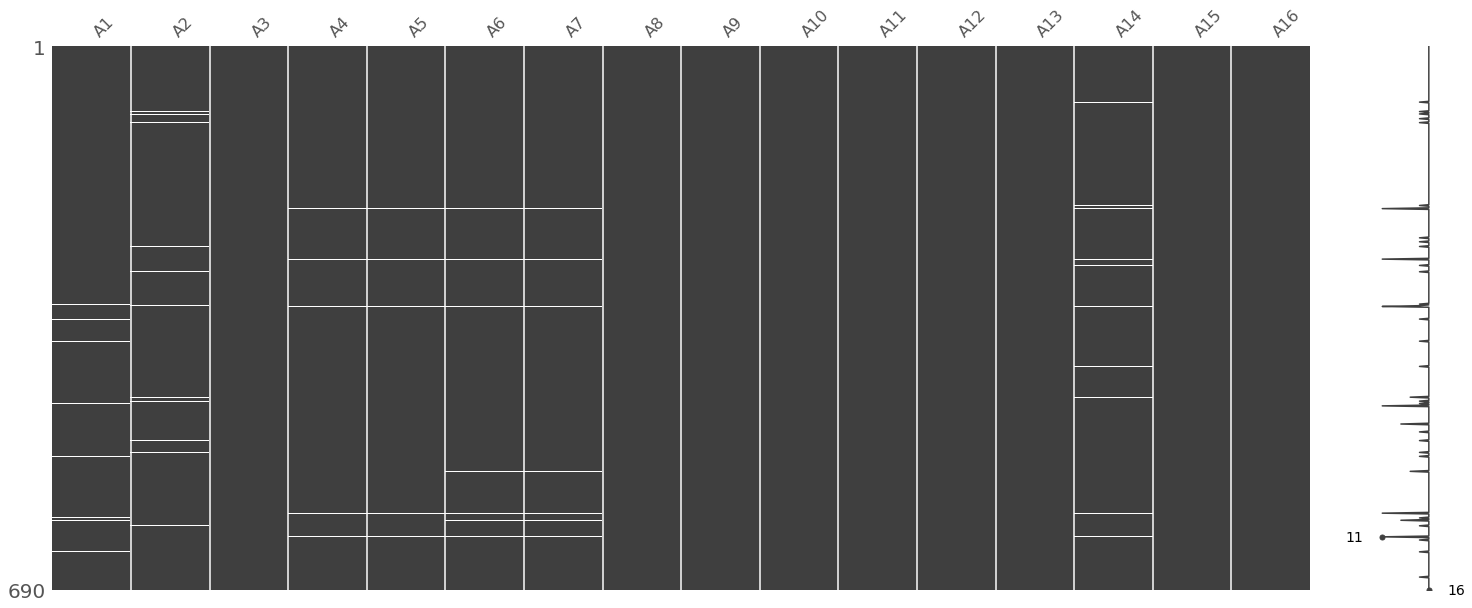

In [ ]:
import missingno as msno
msno.matrix(data)

Dessa forma podemos visualizar que existem poucos dados faltantes nesse conjunto de dados, desse modo pode ser interessante apenas retirar-los pois não haveria uma perda grande de informação, ou retirar apenas aqueles que estão em variáveis categóricas e preencher com a média da coluna aqueles que se encontram em variáveis numéricas. Para essa análise preferimos retirar apenas aqueles que estão em variáveis categóricas e preencher com a média da coluna aqueles que se encontram em variáveis numéricas.


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


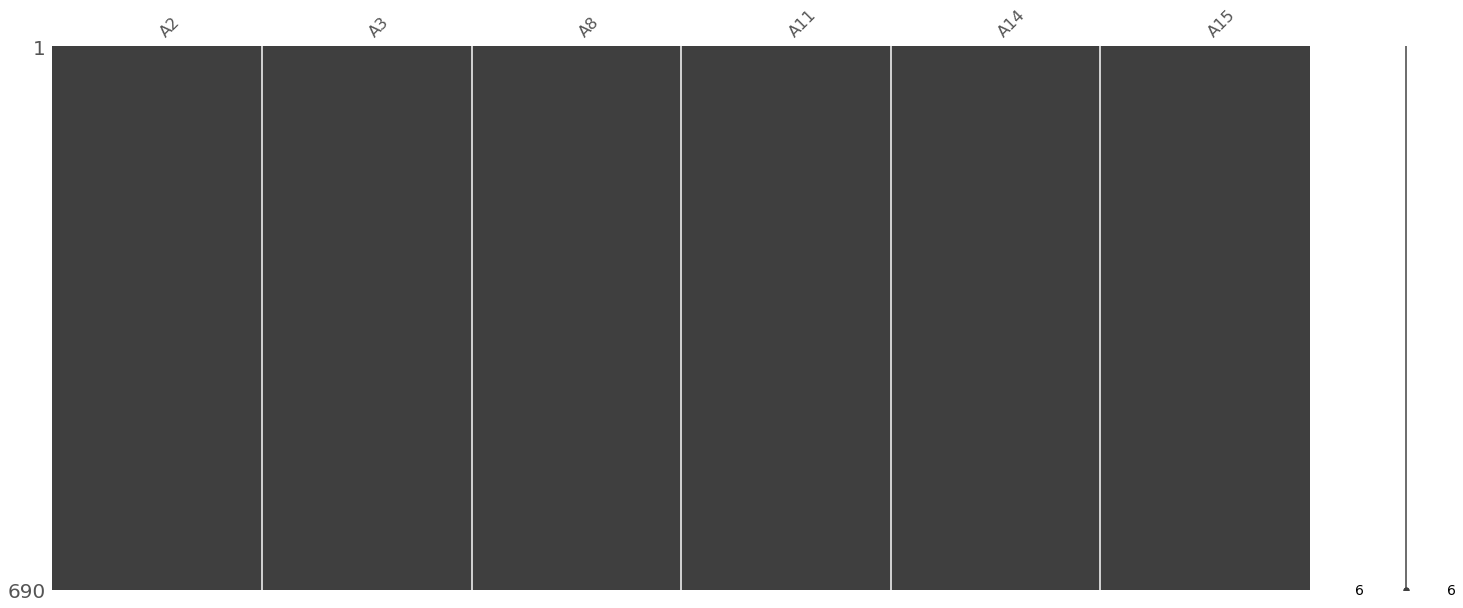

In [ ]:

data_cont = data[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]
data_cont.fillna(data_cont.mean(), inplace = True)
msno.matrix(data_cont)

data["A2"] = data_cont["A2"]
data["A3"] = data_cont["A3"]
data["A8"] = data_cont["A8"]
data["A11"] = data_cont["A11"]
data["A14"] = data_cont["A14"]
data["A15"] = data_cont["A15"]

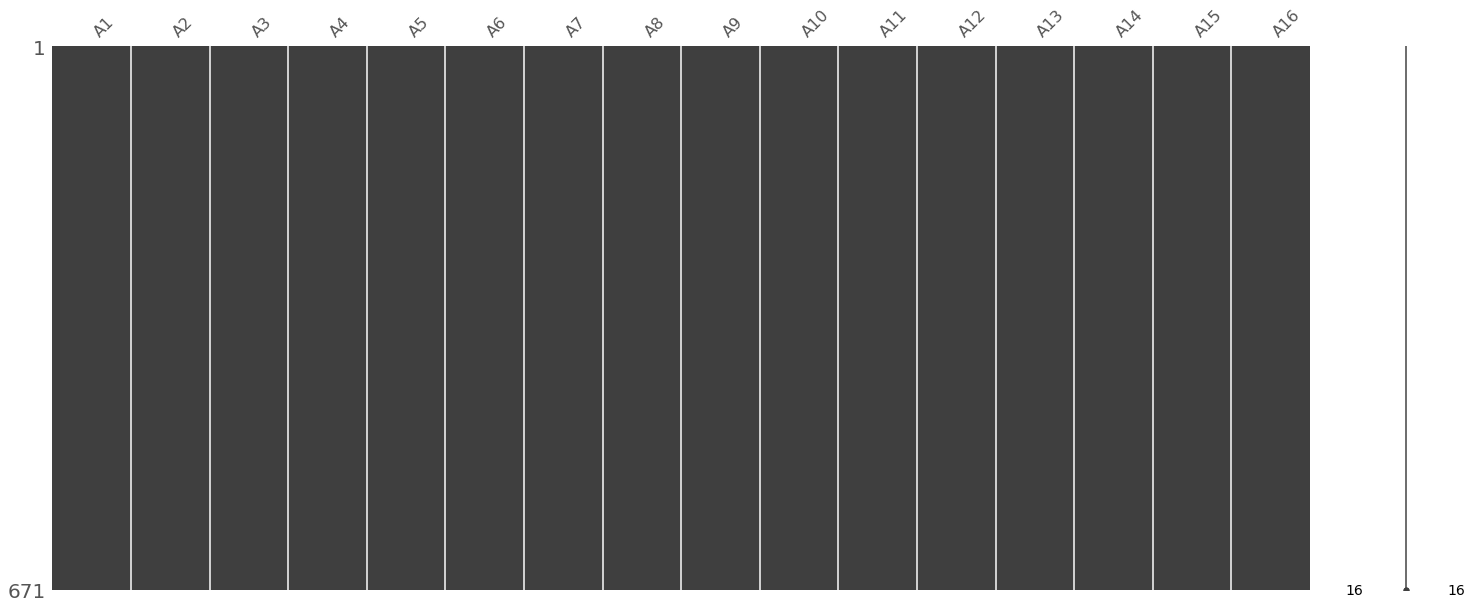

In [ ]:
data = data.dropna()
msno.matrix(data)

## Visualizando a relação das variáveis categóricas com a variável resposta

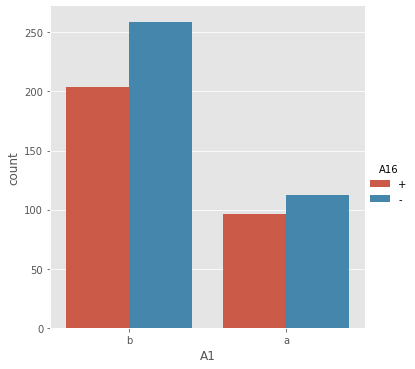

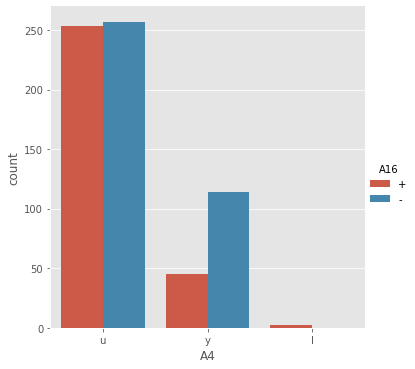

In [ ]:
sns.catplot(x="A1", kind="count", hue="A16", data=data)
sns.catplot(x="A4", kind="count", hue="A16", data=data)

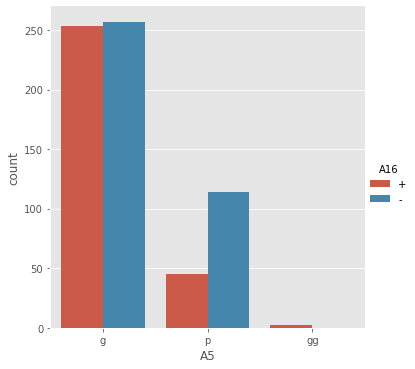

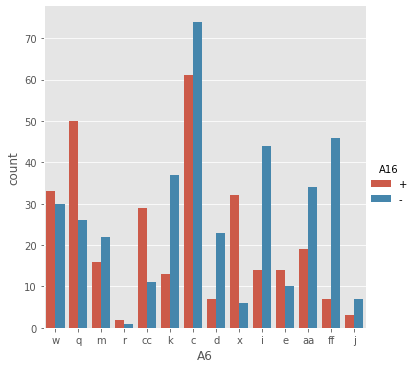

In [ ]:
sns.catplot(x="A5", kind="count", hue="A16", data=data)
sns.catplot(x="A6", kind="count", hue="A16", data=data)

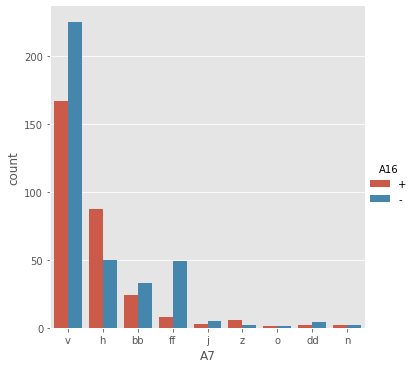

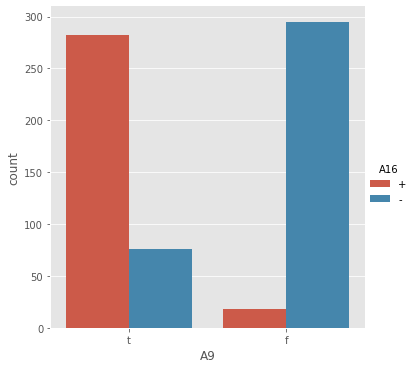

In [ ]:
sns.catplot(x="A7", kind="count", hue="A16", data=data)
sns.catplot(x="A9", kind="count", hue="A16", data=data)

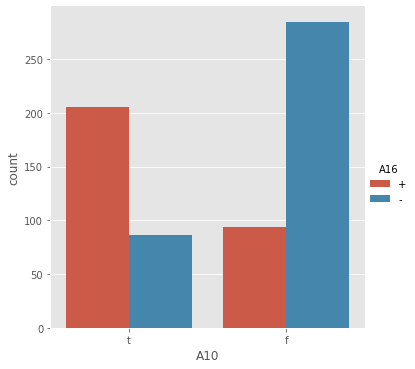

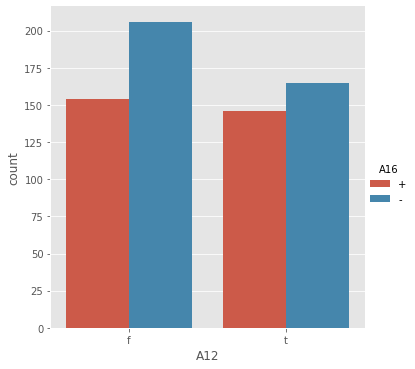

In [ ]:
sns.catplot(x="A10", kind="count", hue="A16", data=data)
sns.catplot(x="A12", kind="count", hue="A16", data=data)

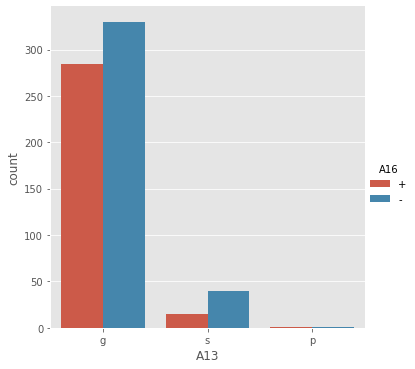

In [ ]:
sns.catplot(x="A13", kind="count", hue="A16", data=data)

Pelos gráficos é possível notar uma relação de possível correlação entre a A9 e A16 e entre a A10 e A16, tornando A9 e A10 variáveis interessantes.

## Plotando as variáveis contínuas

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


<Figure size 576x576 with 0 Axes>

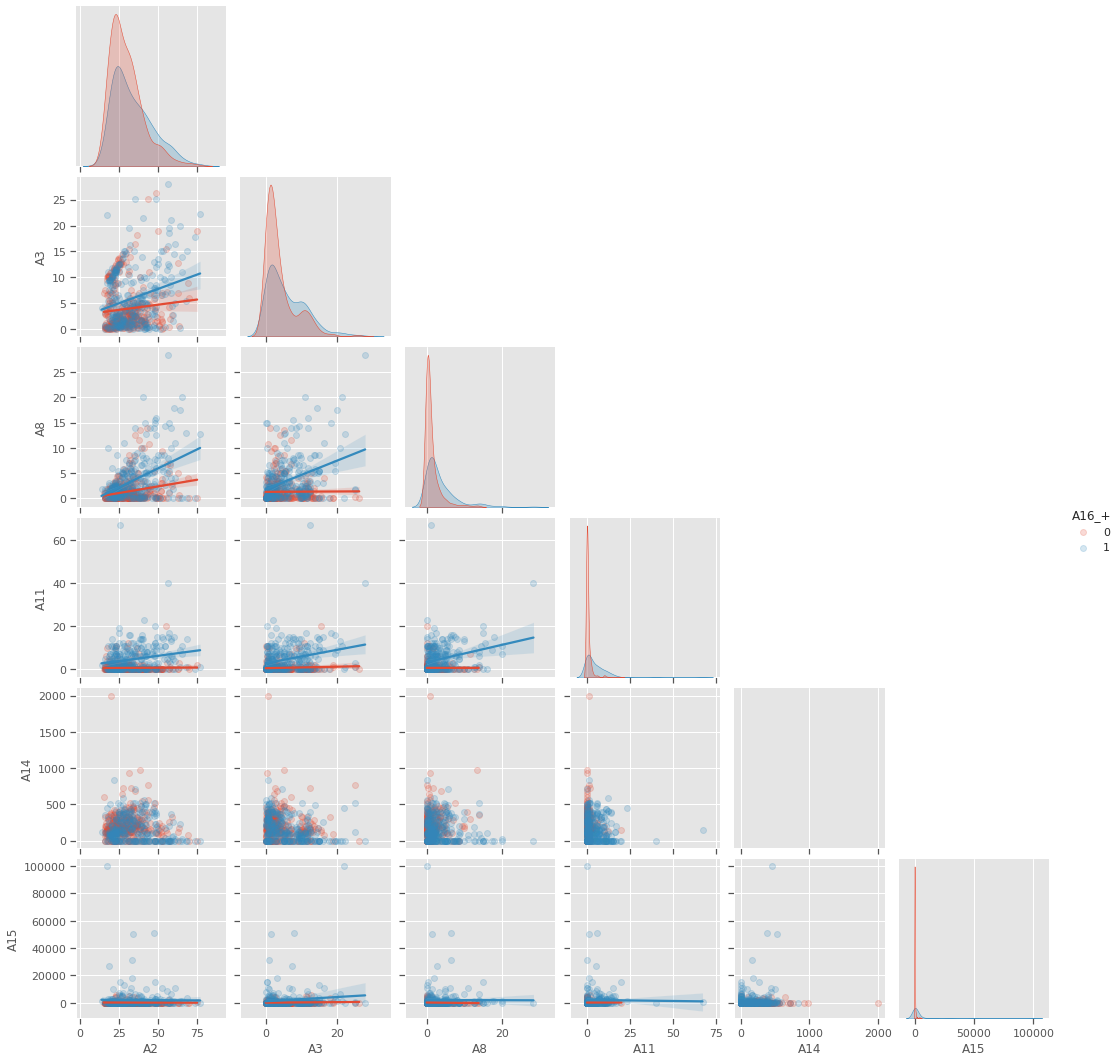

In [ ]:
variaveis_pertinentes = data[["A16", "A2", "A3", "A8", "A11","A14", "A15"]].copy()
variaveis_pertinentes = pd.get_dummies(variaveis_pertinentes, columns=["A16"])
variaveis_pertinentes.drop(["A16_-"], axis=1, inplace=True) # Manter ambas as variáveis seria redundante
sns.set(style="ticks", color_codes=True)
plt.style.use('ggplot')
# Plotando a distribuição em pares das variáveis pertinentes e seus histogramas
plt.figure(figsize=(8,8))
sns.pairplot(variaveis_pertinentes, hue="A16_+", corner=True, kind="reg", diag_kind="kde", plot_kws={'scatter_kws': {'alpha': 0.2}})
plt.show()

As variáveis contínuas, possuem uma distribuição bastante concentrada nos valores mais à esquerda do gráfico. As A3 e A2 são as que tem ainda uma distribuição mais "uniforme". É possível ver que as classes se misturam bastante em todas combinações de variáveis e é difícil fazer sua distinção.

## Visualizando a Matriz de Correlação

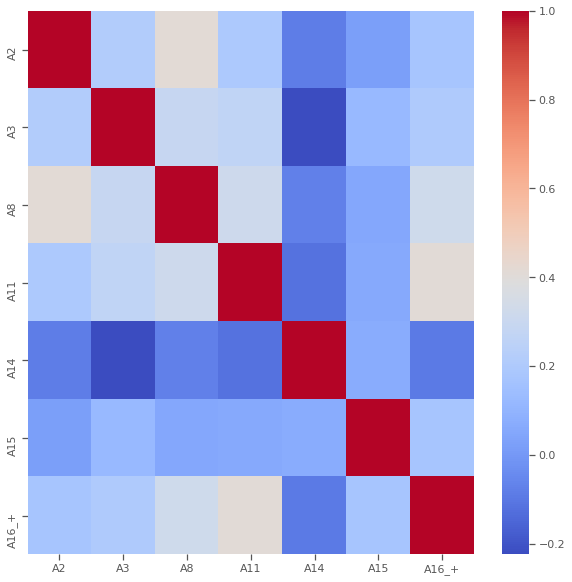

In [ ]:
# Visualizando a matriz de correlação
corr = variaveis_pertinentes.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap= 'coolwarm')
plt.show()

A8 e A11 são as variáveis com maior correlação com a variável resposta A16_-, no entanto suas correlações não chegam a ser fortes.

In [ ]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.828125,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.656250,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.828125,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.171875,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Criando grafico de dispersão dos dados com paleta de cores

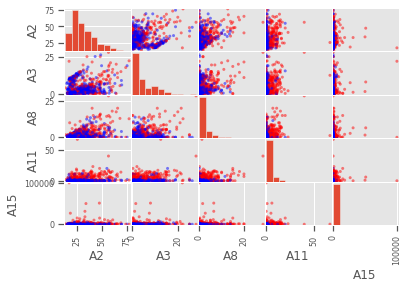

In [ ]:
from pandas.plotting import scatter_matrix

colors_palette = {'+': 'red', '-': 'blue'}
colors = [colors_palette[c] for c in data['A16']]
scatter_matrix(data[['A1',	'A2',	'A3',	'A4',	'A5',	'A6',	'A7',	'A8',	'A9',	'A10',	'A11',	'A12',	'A13',	'A15',	'A16']], c=colors)
plt.show()

# Missão 3: Preparação dos dados

## O problema da variável A14

Ao ler a documentação dos dados é possível notar que a variável A14 foi descrita como sendo contínua, no entanto ela aparenta ser uma variável de endereço postal, portanto existe perda de informação ao transformá-la em contínua, ela seria categórica e deve ser tratada de outra maneira, portanto voltará ao seu estado inicial.


In [ ]:
data.A14.value_counts()

0.0      131
120.0     35
200.0     34
160.0     33
100.0     30
        ... 
186.0      1
32.0       1
432.0      1
840.0      1
202.0      1
Name: A14, Length: 167, dtype: int64

In [ ]:
a14_before.value_counts()

00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00760      1
00186      1
00680      1
00383      1
00369      1
Name: A14, Length: 170, dtype: int64

In [ ]:
a14_before.describe()

count       677
unique      170
top       00000
freq        132
Name: A14, dtype: object

Em sua forma atual, com 170 valores categóricos únicos nessa coluna de "código postal", um modelo de aprendizagem de máquina não pode extrair nenhuma das informações úteis contidas em cada código postal para avaliar uma relação com o preço. 

Dentro de cada uma destas categorias existe uma seleção única de fatores imobiliários significativos como parques, escolas, cafés, lojas, mercearias, acesso a trânsito e estradas principais, além disso também podem ser extraídas informações sobre renda média da área, todos esses novos fatores poderiam ser úteis para um modelo. 

Existem diversas formas de fazer com que as informações de código postal sejam úteis, pode ser possível extrair a latitude e longitude das mesmas e realizar um cruzamento com bases externas populacionais (como as do IBGE), podemos também agrupar os códigos postais de uma mesma área e criar classes com eles ou podemos realizar o one hot enconding (que será tratado adiante) da mesma forma que em qualquer outra variável categórica.

Como os dados estão anonimizados é difícil extrair muitas informações ou realizar agrupamentos com a variável de código postal, dada essa limitação iremos apenas realizar o procedimento de one hot encoding nela, assim como em outras variáveis categóricas.

In [ ]:
data.A14 = a14_before

## Convertendo dados categóricos em dados numéricos

### Por que converter?

Dados categóricos são variáveis que contêm valores de rótulos ao invés de valores numéricos, seu número de valores possíveis é muitas vezes limitado a um conjunto fixo.

As variáveis "A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13", "A14" do nosso conjunto de dados são categóricas.

Alguns algoritmos podem funcionar diretamente com dados categóricos, por exemplo, uma árvore de decisão pode ser aprendida diretamente com dados categóricos sem necessidade de transformação de dados (dependendo de uma implementação específica). No entanto muitos algoritmos de aprendizagem de máquina (regressões por exemplo) não podem operar diretamente com dados nominais, eles exigem que todas as variáveis de entrada e de saída sejam numéricas.

Dessa maneira é interessante que, para não perdermos as informações contidas nos dados categóricos, eles sejam convertidos para uma forma numérica. 


### Pode ser feito de duas maneiras:

1. Integer Encoding
2. One-Hot Encoding






### 1. Integer Encoding

Para cada valor único de uma categoria é atribuído um valor inteiro.

Em nossa base por exemplo, na coluna A16, podemos atribuir 1 a "+" (aprovado) e "-" (reprovado) seria 0. Isto é chamado de codificação de etiqueta ou Integer Encoding e é facilmente reversível. Para algumas variáveis, como é o caso da nossa variável resposta isto já é suficiente.

Nesse caso os valores inteiros têm uma relação de ordenação natural entre si e alguns algoritmos de aprendizagem da máquina são capazes de entender e aproveitar esta relação. Portanto é interessante manter o 1 como aprovado e 0 como reprovado pois aprovado é uma classe "superior" à reprovado.

In [ ]:
data["A16"] = data["A16"].replace('+', 1)
data["A16"] = data["A16"].replace('-', 0)


### 2. One-Hot Encoding

Para variáveis categóricas onde não existe relação ordinal, a integer encoding não é suficiente. Ao usar esse tipo de codificação permitiríamos que qualquer modelo utilizado assumisse uma ordenação natural entre as categorias, o que pode resultar em um desempenho ruim ou resultados inesperados com previsões "no meio do caminho" entre categorias.

Dessa forma podemos usar o one-hot encoding e criar uma variável binária para cada classe da variável categórica. Por exemplo a variável A4 possui três valores, u, y e l, quando a classe for u será colocado 1 na variável nova a4_u e 0 nas demais. 



|  a4_u | a4_y  | a4_l  |
|---|---|---|
|  1 | 0  |  0 |   
|  0 |  1 |  0 |   
|  0 |  0 |  1 |   

Também é interessante remover colunas redundantes dos nossos dados, por exemplo, com as informações das variáveis u e y já podemos inferir o valor da l, portanto ela não é necessária na nossa base de dados e ao final da transformação da coluna A4 em dados numéricos as colunas finais poderiam ser apenas: 

|  a4_u | a4_y  | 
|---|---|
|  1 | 0  |    
|  0 |  1 |   
|  0 |  0 |   

sem haver perda alguma de informação.

Não há informação o suficiente sobre as variáveis restantes para presumir que existe alguma relação ordinal entre as classes, portanto iremos assumir que para o restante das variáveis categóricas da nossa base é mais interessante utilizar o one-hot encoding.

In [ ]:
data_dummified = pd.get_dummies(data, columns = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13", "A14"], drop_first= True)

### Observando a matriz de correlação agora com as transformações nas variáveis

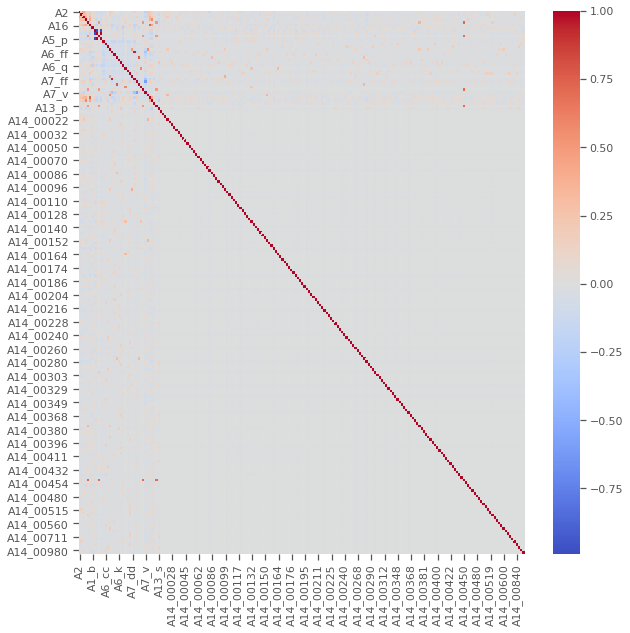

In [ ]:
# Visualizando a matriz de correlação
corr = data_dummified.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap= 'coolwarm')
plt.show()


A matriz possui bastante colunas agora, o que torna sua visualização difícil, portanto iremos buscar na coluna A16 quais seriam as variáveis com maior correlação.

In [ ]:
corr["A16"].abs().sort_values()

A14_00360    0.003825
A6_c         0.004803
A14_00228    0.005818
A14_00129    0.005818
A7_o         0.005818
               ...   
A8           0.324798
A11          0.409645
A10_t        0.456158
A9_t         0.732671
A16          1.000000
Name: A16, Length: 202, dtype: float64

Dessa maneira vemos que A10_t e A9_t seriam as variáveis que possuem maior correlação com A16

In [ ]:
data_dummified.head()

,A2,A3,A8,A11,A15,A16,A1_b,A4_u,A4_y,A5_gg,A5_p,A6_c,A6_cc,A6_d,A6_e,A6_ff,A6_i,A6_j,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A7_dd,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A14_00017,A14_00020,A14_00021,...,A14_00400,A14_00408,A14_00410,A14_00411,A14_00416,A14_00420,A14_00422,A14_00431,A14_00432,A14_00434,A14_00440,A14_00443,A14_00450,A14_00454,A14_00455,A14_00460,A14_00465,A14_00470,A14_00480,A14_00487,A14_00491,A14_00500,A14_00510,A14_00515,A14_00519,A14_00520,A14_00523,A14_00550,A14_00560,A14_00583,A14_00600,A14_00640,A14_00680,A14_00711,A14_00720,A14_00760,A14_00840,A14_00928,A14_00980,A14_02000
0,30.828125,0.000,1.25,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,58.656250,4.460,3.04,6,560,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24.500000,0.500,1.50,0,824,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27.828125,1.540,3.75,5,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20.171875,5.625,1.71,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


OBS: Normalizar dados contínuos, one hot ou dummifier, separação de classes? Verificação bidimensional (Gráficos de Dispersão), olhar no slide. Possivelmente remover A14 ou transformar em categórica. 

## Normalizando dados contínuos

A normalização é uma técnica frequentemente aplicada como parte da preparação de dados para a aprendizagem de máquina. O objetivo da normalização é mudar os valores das colunas numéricas do conjunto de dados para uma escala comum, sem distorcer as diferenças nas faixas de valores. Para a aprendizagem de máquina nem todo conjunto de dados requer normalização, ela só é necessária quando as colunas possuem faixas de valores diferentes.

Por exemplo, considerando o nosso conjunto de dados, a variável A2 e a A3, A2 varia de aproximandamente 13 até 76, com média de 31.46 e desvio padrão de 11.70. Enquanto A3 varia de 0 até 28, com média de 4.83 e desvio padrão de 5.0006. Portanto podemos afirmar que estas duas características estão em faixas diferentes, quando fazemos mais análises, como a regressão linear multivariada, por exemplo, é possível. que A2 influenciará o resultado mais devido a seu maior valor. Mas isto não significa necessariamente que seja mais importante como um preditor.

Uma observação importante é que a normalização deve ser feita após a divisão dos dados entre o conjunto de treinamento e o conjunto de testes, normalizando separadamente ambos os conjuntos.

Devemos fazer isso porque o conjunto de teste desempenha o papel de dados novos e invisíveis, portanto não deve ser acessível na fase de treinamento. Usar qualquer informação (média, máximo, mínimo, desvio padrão) proveniente do conjunto de teste antes ou durante o treinamento é um viés potencial na avaliação do desempenho.

## Conjunto de treino e conjunto de testes

A divisão do treino/teste é uma técnica para avaliar o desempenho de um algoritmo de aprendizagem de máquinas. O procedimento envolve pegar um conjunto de dados e dividi-lo em dois subconjuntos. O primeiro subconjunto é usado para se ajustar ao modelo e é chamado de conjunto de dados de treinamento. O segundo subconjunto é utilizado para realizar previsões, apenas levando em consideração a variável resposta como elemento de entrada, depois que são feitas as previsões elas são comparadas com os valores esperados. Este segundo conjunto de dados é referido como o conjunto de dados de teste.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data_dummified.drop("A16", axis=1)
y = data_dummified["A16"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

## Normalizando os dados
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.14869323, 0.08928571, 0.15789474, ..., 0.        , 0.        ,
        0.        ],
       [0.42197412, 0.23214286, 0.01754386, ..., 0.        , 0.        ,
        0.        ],
       [0.01065719, 0.27232143, 0.00438596, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12585638, 0.00607143, 0.00298246, ..., 0.        , 0.        ,
        0.        ],
       [0.18117229, 0.46428571, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12433393, 0.10714286, 0.04526316, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_test

array([[0.09870591, 0.08339286, 0.01754386, ..., 0.        , 0.        ,
        0.        ],
       [0.13651358, 0.41071429, 0.10526316, ..., 0.        , 0.        ,
        0.        ],
       [0.42755646, 0.055     , 0.12280702, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23141335, 0.04464286, 0.06140351, ..., 0.        , 0.        ,
        0.        ],
       [0.4818574 , 0.25      , 0.05701754, ..., 0.        , 0.        ,
        0.        ],
       [0.34483634, 0.02678571, 0.02052632, ..., 0.        , 0.        ,
        0.        ]])

# Missão 4: KNN vs LVQ

Iremos agora testar e comparar 2 algoritmos de classificação com os dados de Credit Approval, o KNN e o LVQ.

## KNN

O algoritmo KNN assume que coisas similares existem em grande proximidade. Em outras palavras, coisas semelhantes estão próximas uma da outra, ele depende desta suposição ser verdadeira o suficiente para que seja útil. O KNN captura a idéia de semelhança (às vezes chamada distância, proximidade ou proximidade) a partir do cálculo da distância entre pontos, a distância em linha reta (também chamada de distância Euclidiana) é uma escolha popular e familiar para calcular a proximidade entre pontos no KNN e, assim, realizar uma tarefa de classificação em diferentes grupos.


Abaixo iremos aplicar o algoritmo KNN diretamente nos dados que foram separados em treino e teste na missão anterior.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = KNeighborsClassifier(n_neighbors=14)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

### Matriz de Confusão

A matriz de confusão é tabela que mostra as frequências de classificação para cada classe do modelo. 

- Verdadeiro positivo (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. 
- Falso positivo (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente.
- Verdadeiro negativo (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. 
- Falso negativo (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. 

No nosso problema estamos procurando prever a classe de cartões aprovados

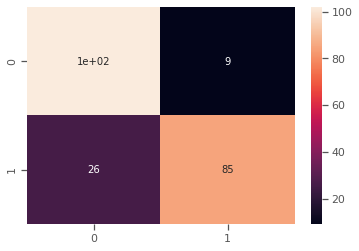

In [ ]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

A matriz de confusão inicial possui um valor de verdadeiros positivos significativo.

### Recall

Segundo o Google Developers para Machine Learning [https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall] , entendemos que o recall responde a seguinte pergunta: qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos. Ele é definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

### Precision

Ainda usando o material do Google Developers, precisão é definida como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? É a razão entre os verdadeiros positivos sobre verdadeiros positivos + falsos positivos.

### f1 score

O f-measure ou f1 score é a média harmônica do precision e recall. Na maioria das situações, você terá um trade-off entre precision e recall. Se seu classificador for otimizado para aumentar um e desfavorecer o outro, a média harmônica diminui rapidamente, no entanto, é maior quando tanto o precision quanto o recall tem valores parecidos.

F-measure tem um significado intuitivo. Ela lhe diz quão preciso é seu classificador (quantas instâncias ele classifica corretamente), bem como quão robusto ele é (ele não perde um número significativo de instâncias).

Com alta precisão, mas baixo recall, seu classificador é extremamente preciso, mas perde um número significativo de instâncias que são difíceis de classificar e isso não seria muito útil. Portanto o f-measure será a métrica que iremos utilizar para comparar os algoritmos de classificação.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       111
           1       0.90      0.77      0.83       111

    accuracy                           0.84       222
   macro avg       0.85      0.84      0.84       222
weighted avg       0.85      0.84      0.84       222



In [ ]:
f1_score(y_test, y_pred)

0.8292682926829268

Conseguimos um score bom com essa iteração com 14 vizinhos e a separação prévia dos dados em treino e teste, no entanto iremos variar o número de vizinhos e realizar um k-fold para comparar os modelos e selecionar o melhor.

### Usando k-fold

### Escolhendo o valor certo para k (número de vizinhos)

Para selecionar o K adequado para nossos dados, executamos o algoritmo KNN várias vezes com diferentes valores de K e escolhemos o K que reduz o número de erros que encontramos, mantendo a capacidade do algoritmo de fazer previsões com precisão quando são fornecidos dados que não foram vistos antes.

1. À medida que diminuimos o valor de K para 1, nossas previsões se tornam menos estáveis. Basta pensar por um minuto, imagine K=1 e temos um ponto de consulta cercado por vários vermelhos e um verde, mas o verde é o único vizinho mais próximo. Razoavelmente, pensaríamos que o ponto de interrogação é provavelmente vermelho, mas porque K=1, KNN prevê incorretamente que o ponto de interrogação é verde.

2. Inversamente, à medida que aumentamos o valor de K, nossas previsões se tornam mais estáveis devido à votação por maioria / média e, portanto, mais propensas a fazer previsões mais precisas (até um certo ponto). Eventualmente, começamos a testemunhar um número crescente de erros. É neste ponto que sabemos que elevamos demais o valor de K.

Iremos variar k entre 3 e 25 para o nosso problema.

In [ ]:
n_neighbors = range(3,25)

X = data_dummified.drop("A16", axis=1)
y = data_dummified["A16"]

list_scores = []
f1_scores = []

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=2673512)
for n in n_neighbors:
  for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ## Normalizando os dados
    scaler = MinMaxScaler()

    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)


    index = 0
    class_report = classification_report(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    name = "knn_{}_fold_{}".format(n,index)
    index = index+1
    dict_entry = {'name': name, 'class_report': class_report, 'acc_score': acc_score, "f1_score": f1, "conf_matrix": conf_matrix}
    list_scores.append(dict_entry)
    f1_scores.append(f1)

### Encontrando o melhor f1 score

In [ ]:
best_f1 = max(f1_scores)
print(best_f1)

0.9105691056910569


In [ ]:
index_best = f1_scores.index(best_f1)
best_entry = list_scores[index_best]
best_entry

{'acc_score': 0.917910447761194,
 'class_report': '              precision    recall  f1-score   support\n\n           0       0.94      0.91      0.92        74\n           1       0.89      0.93      0.91        60\n\n    accuracy                           0.92       134\n   macro avg       0.92      0.92      0.92       134\nweighted avg       0.92      0.92      0.92       134\n',
 'conf_matrix': array([[67,  7],
        [ 4, 56]]),
 'f1_score': 0.9105691056910569,
 'name': 'knn_21_fold_0'}

O novo f score melhorou em quase 9 pontos percentuais, após a aplicação do k-fold e variação dos vizinhos, agora o modelo utiliza os 21 vizinhos mais próximos.

In [ ]:
best_entry['acc_score']

0.917910447761194

In [ ]:
print(best_entry['class_report'])

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        74
           1       0.89      0.93      0.91        60

    accuracy                           0.92       134
   macro avg       0.92      0.92      0.92       134
weighted avg       0.92      0.92      0.92       134



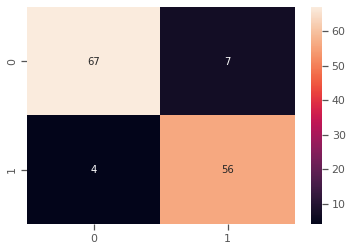

In [ ]:
sns.heatmap(best_entry['conf_matrix'], annot=True)

Aqui vemos que na matriz de confusão do melhor modelo em relação ao f score os falsos positivos e falsos negativos diminuiram consideravelmente, enquanto os verdadeiros negativos e verdadeiros positivos continuam com um número significativo. Ele realmente balanceou mais o precision e o recall do modelo.

## LVQ

Uma desvantagem do K-Nearest Neighbors é que você precisa se agarrar a todo o seu conjunto de dados de treinamento.

O algoritmo de Quantificação do Vetor de Aprendizado (ou LVQ, para abreviar) é um algoritmo de rede neural artificial que permite que você escolha quantas instâncias de treinamento deve se manter e aprenda exatamente como devem ser essas instâncias.

A representação para LVQ é uma coleção de vetores codebook.

Um vetor codebook é uma lista de números que têm os mesmos atributos de entrada e saída que seus dados de treinamento. Por exemplo, se seu problema for uma classificação binária com classes 0 e 1, e os inputs largura, comprimento e altura, então um vetor codebook seria composto de todos os quatro atributos: largura, comprimento, altura e classe.

A representação do modelo é um conjunto fixo de vetores codebook, aprendidos com os dados de treinamento. Parecem instâncias de treinamento, mas os valores de cada atributo foram adaptados com base no procedimento de aprendizagem.

Na linguagem das redes neurais, cada vetor codebook pode ser chamado de neurônio, cada atributo deles é chamado de peso e a coleção de vetores codebook é chamada de rede.

As previsões são feitas para uma nova instância (x) através da busca em todos os vetores codebook para as instâncias K mais similares e resumindo a variável de saída para essas instâncias K. Para a classificação, este é o valor da classe modal (ou mais comum).

Abaixo iremos instanciar um modelo LVQ para usar nos nossos dados de Credit Approval.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

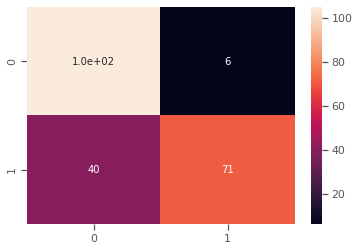

In [ ]:
from neupy import algorithms

X = data_dummified.drop("A16", axis=1)
y = data_dummified["A16"]

inputs = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

## Normalizando os dados
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lvqnet = algorithms.LVQ21(n_inputs=inputs, n_classes=2)
lvqnet.train(X_train, y_train, epochs=5)
y_pred = lvqnet.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

Assim como no KNN sua matriz de confusão obteve muitos verdadeiros positivos (no entanto menos do que o nosso algoritmo de KNN inicial)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       111
           1       0.92      0.64      0.76       111

    accuracy                           0.79       222
   macro avg       0.82      0.79      0.79       222
weighted avg       0.82      0.79      0.79       222



In [ ]:
print(f1_score(y_test, y_pred))

0.7553191489361702


O f-score inicial também foi menor do que o observado no KNN. Agora iremos variar os parâmetros epoch e o learning rate em um k-fold para observar se há alguma melhora no modelo.

In [ ]:
epochs = range(5,55,10)
learning_rate = (0.01, 0.05, 0.1, 0.2)

X = data_dummified.drop("A16", axis=1)
y = data_dummified["A16"]

inputs = X.shape[1]

list_scores = []
f1_scores = []

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=2673512)
for n in epochs:
  for l_rate in learning_rate:
    for train_index, test_index in skf.split(X, y):
      #print("TRAIN:", train_index, "TEST:", test_index)
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      ## Normalizando os dados
      scaler = MinMaxScaler()

      scaler.fit(X_train)

      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)


      classifier = algorithms.LVQ21(n_inputs=inputs, n_classes=2,step=l_rate)
      classifier.train(X_train, y_train, epochs=n)

      y_pred = classifier.predict(X_test)


      index = 0
      class_report = classification_report(y_test, y_pred)
      acc_score = accuracy_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      conf_matrix = confusion_matrix(y_test, y_pred)
      name = "lvq_{}_step_{}_fold_{}".format(n,l_rate, index)
      index = index+1
      dict_entry = {'name': name, 'class_report': class_report, 'acc_score': acc_score, "f1_score": f1, "conf_matrix": conf_matrix}
      list_scores.append(dict_entry)
      f1_scores.append(f1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

In [ ]:
best_f1 = max(f1_scores)
print(best_f1)

0.9193548387096774


In [ ]:
index_best = f1_scores.index(best_f1)
best_entry = list_scores[index_best]
best_entry

{'acc_score': 0.9253731343283582,
 'class_report': '              precision    recall  f1-score   support\n\n           0       0.96      0.91      0.93        74\n           1       0.89      0.95      0.92        60\n\n    accuracy                           0.93       134\n   macro avg       0.92      0.93      0.92       134\nweighted avg       0.93      0.93      0.93       134\n',
 'conf_matrix': array([[67,  7],
        [ 3, 57]]),
 'f1_score': 0.9193548387096774,
 'name': 'lvq_5_step_0.01_fold_0'}

In [ ]:
best_entry['acc_score']

0.9253731343283582

Houve uma melhora significativa no modelo ao variar as epochs e o learning_rate, o seu score f1 chegou a superar o score do KNN em 0.9 pontos percentuais, com 5 epochs e um learning rate de 0.01.

In [ ]:
print(best_entry['class_report'])

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        74
           1       0.89      0.95      0.92        60

    accuracy                           0.93       134
   macro avg       0.92      0.93      0.92       134
weighted avg       0.93      0.93      0.93       134



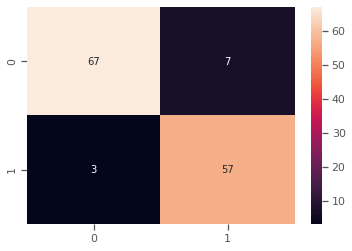

In [ ]:
sns.heatmap(best_entry['conf_matrix'], annot=True)

Aqui vemos uma matriz muito similar a que obtivemos no final do KNN, onde os falsos positivos e falsos negativos diminuiram consideravelmente, enquanto os verdadeiros negativos e verdadeiros positivos continuam com um número significativo. Seus números são apenas ligeiramente melhores que o KNN.
